Perform EDA on the data and build a model which will predict whether the person will suffer from Heart-attack or not

**Project Objectives:**
Five million Americans are currently living with heart diseases, and the numbers are expected to rise.It is very important to understand the factors which causes Heart-attacks so that certain precaution can be taken by individuals. In order to understand the reasons of the Heart-attack, a data was collected from various hospitals across US which is given in US. Heart_patients.csv. In the data set there are Heart-Att indicates whether the person suffered from Heart attack or not.

In [ ]:
import numpy as np
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt       ##ploting graph
import matplotlib.style
plt.style.use('classic')

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("/content/sample_data/US_Heart_Patients_2.csv")

In [ ]:
df.head(5)

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
0,Male,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,Female,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,Male,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,Female,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,Female,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
df.tail(5)

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
4235,Female,48.0,2.0,1.0,20.0,NaN,0.0,0.0,0.0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,Female,44.0,1.0,1.0,15.0,0.0,0.0,0.0,0.0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,Female,52.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,Male,40.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,185.0,141.0,98.0,25.60,67.0,72.0,0
4239,Female,39.0,3.0,1.0,30.0,0.0,0.0,0.0,0.0,196.0,133.0,86.0,20.91,85.0,80.0,0


In [ ]:
print("No of rows: ",df.shape[0], "\n""No. of columns: ",df.shape[1])

No of rows:  4240 
No. of columns:  16


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4232 non-null   object 
 1   age              4238 non-null   float64
 2   education        4130 non-null   float64
 3   currentSmoker    4237 non-null   float64
 4   cigsPerDay       4209 non-null   float64
 5   BP Meds          4180 non-null   float64
 6   prevalentStroke  4231 non-null   float64
 7   prevalentHyp     4238 non-null   float64
 8   diabetes         4238 non-null   float64
 9   tot cholesterol  4180 non-null   float64
 10  Systolic BP      4236 non-null   float64
 11  Diastolic BP     4235 non-null   float64
 12  BMI              4216 non-null   float64
 13  heartRate        4236 non-null   float64
 14  glucose          3849 non-null   float64
 15  Heart-Att        4240 non-null   int64  
dtypes: float64(14), int64(1), object(1)
memory usage: 530.1+ KB


In [ ]:
for column in df.columns:
    print(column.upper(),':',df[column].nunique())
    print()
    print(df[column].value_counts())
    print()

GENDER : 2

Gender
Female    2414
Male      1818
Name: count, dtype: int64

AGE : 39

age
40.0    192
46.0    182
42.0    180
41.0    174
48.0    173
39.0    170
44.0    166
45.0    162
43.0    158
52.0    149
51.0    146
55.0    145
38.0    144
47.0    141
50.0    140
53.0    139
54.0    132
49.0    132
57.0    123
56.0    123
59.0    119
58.0    117
60.0    110
63.0    110
61.0    110
62.0     99
64.0     93
37.0     92
36.0     84
65.0     57
67.0     45
35.0     42
66.0     38
34.0     18
68.0     18
69.0      7
33.0      5
70.0      2
32.0      1
Name: count, dtype: int64

EDUCATION : 4

education
1.0    1717
2.0    1252
3.0     688
4.0     473
Name: count, dtype: int64

CURRENTSMOKER : 2

currentSmoker
0.0    2143
1.0    2094
Name: count, dtype: int64

CIGSPERDAY : 33

cigsPerDay
0.0     2145
20.0     734
30.0     217
15.0     210
10.0     143
9.0      130
5.0      120
3.0      100
40.0      80
1.0       67
43.0      56
25.0      55
35.0      22
2.0       18
6.0       18
7.0     

In [ ]:
cat = ["education","currentSmoker","BP Meds","prevalentStroke","prevalentHyp","diabetes"]        ##category var

In [ ]:
for i in cat:
    df[i] = df[i].astype('object')        ## change data type make it object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4232 non-null   object 
 1   age              4238 non-null   float64
 2   education        4130 non-null   object 
 3   currentSmoker    4237 non-null   object 
 4   cigsPerDay       4209 non-null   float64
 5   BP Meds          4180 non-null   object 
 6   prevalentStroke  4231 non-null   object 
 7   prevalentHyp     4238 non-null   object 
 8   diabetes         4238 non-null   object 
 9   tot cholesterol  4180 non-null   float64
 10  Systolic BP      4236 non-null   float64
 11  Diastolic BP     4235 non-null   float64
 12  BMI              4216 non-null   float64
 13  heartRate        4236 non-null   float64
 14  glucose          3849 non-null   float64
 15  Heart-Att        4240 non-null   int64  
dtypes: float64(8), int64(1), object(7)
memory usage: 530.1+ KB


In [ ]:
cat = []
num =[]
for i in df.columns:
    if df[i].dtype == 'object':
        cat.append(i)
    else:
        num.append(i)
print(cat)
print(num)

['Gender', 'education', 'currentSmoker', 'BP Meds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
['age', 'cigsPerDay', 'tot cholesterol', 'Systolic BP', 'Diastolic BP', 'BMI', 'heartRate', 'glucose', 'Heart-Att']


In [ ]:
round(df[num].describe(),2).T ##t - transpose

,count,mean,std,min,25%,50%,75%,max
age,4238.0,49.58,8.57,32.00,42.00,49.0,56.00,70.0
cigsPerDay,4209.0,9.00,11.92,0.00,0.00,0.0,20.00,70.0
tot cholesterol,4180.0,236.68,44.62,107.00,206.00,234.0,263.00,696.0
Systolic BP,4236.0,132.36,22.04,83.50,117.00,128.0,144.00,295.0
Diastolic BP,4235.0,82.90,11.91,48.00,75.00,82.0,90.00,142.5
BMI,4216.0,25.80,4.08,15.54,23.07,25.4,28.04,56.8
heartRate,4236.0,75.87,12.00,44.00,68.00,75.0,83.00,143.0
glucose,3849.0,81.95,23.96,40.00,71.00,78.0,87.00,394.0
Heart-Att,4240.0,0.15,0.36,0.00,0.00,0.0,0.00,1.0


In [ ]:
df[cat].describe().T

,count,unique,top,freq
Gender,4232,2,Female,2414
education,4130.0,4.0,1.0,1717.0
currentSmoker,4237.0,2.0,0.0,2143.0
BP Meds,4180.0,2.0,0.0,4056.0
prevalentStroke,4231.0,2.0,0.0,4206.0
prevalentHyp,4238.0,2.0,0.0,2922.0
diabetes,4238.0,2.0,0.0,4129.0


In [ ]:
## Unique values for categorical variables

In [ ]:
for column in df.columns:
    print(column.upper(),':',df[column].nunique())
    print()
    print(df[column].value_counts())
    print()

GENDER : 2

Gender
Female    2414
Male      1818
Name: count, dtype: int64

AGE : 39

age
40.0    192
46.0    182
42.0    180
41.0    174
48.0    173
39.0    170
44.0    166
45.0    162
43.0    158
52.0    149
51.0    146
55.0    145
38.0    144
47.0    141
50.0    140
53.0    139
54.0    132
49.0    132
57.0    123
56.0    123
59.0    119
58.0    117
60.0    110
63.0    110
61.0    110
62.0     99
64.0     93
37.0     92
36.0     84
65.0     57
67.0     45
35.0     42
66.0     38
34.0     18
68.0     18
69.0      7
33.0      5
70.0      2
32.0      1
Name: count, dtype: int64

EDUCATION : 4

education
1.0    1717
2.0    1252
3.0     688
4.0     473
Name: count, dtype: int64

CURRENTSMOKER : 2

currentSmoker
0.0    2143
1.0    2094
Name: count, dtype: int64

CIGSPERDAY : 33

cigsPerDay
0.0     2145
20.0     734
30.0     217
15.0     210
10.0     143
9.0      130
5.0      120
3.0      100
40.0      80
1.0       67
43.0      56
25.0      55
35.0      22
2.0       18
6.0       18
7.0     

In [ ]:
##Null value Analysis and treatment

In [ ]:
round(df.isnull().sum()*100 / df.shape[0],2).sort_values()  ## divide by no.of rows (kitna % null hai)

,0
Heart-Att,0.00
age,0.05
prevalentHyp,0.05
diabetes,0.05
currentSmoker,0.07
Systolic BP,0.09
heartRate,0.09
Diastolic BP,0.12
Gender,0.19
prevalentStroke,0.21


## Handling Duplication

In [ ]:
df.duplicated().sum()    ## No duplicate ,all unique

0

In [ ]:
## Nul values Imputation for Categorical Variable

In [ ]:
df.Gender = df.Gender.fillna("Female")

In [ ]:
df.Gender.isnull().sum()

0

In [ ]:
df.rename(columns = {"BP Meds":"BPMeds","tot cholestrol":"tot_cholestrol","Systolic BP":"Systolic_BP","Diastolic BP":"Diastolic_BP"},inplace = True)

In [ ]:
df_mean = df.copy()
df_median = df.copy()
df_knn = df.copy()

In [ ]:
for column in ['Gender', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']:
  df_mean[column].fillna(df_mean[column].mode()[0],inplace = True)      #replace with mode
  df_median[column].fillna(df_median[column].mode()[0],inplace = True)

In [ ]:
df_mean.isnull().sum()

,0
Gender,0
age,2
education,0
currentSmoker,0
cigsPerDay,31
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
tot cholesterol,60


In [ ]:
df_knn['Gender'].replace(to_replace=['Male','Female'],value=[1,0],inplace =True)

In [ ]:
df.isnull().sum()

,0
Gender,0
age,2
education,0
currentSmoker,0
cigsPerDay,31
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
tot cholesterol,60


for column in df_mean.columns:
  if df_mean[column].dtype == 'object':
    mean = df_mean[column].median()

    df_mean[column] = df_mean[column].fillna(mean)

In [ ]:
for column in df_mean.columns:
  if df_mean[column].dtype == 'object':
    # Check if the column is 'Gender' and replace values if needed
    if column == 'Gender':
      df_mean['Gender'].replace(to_replace=['Male','Female'],value=[1,0],inplace=True)
    # Now calculate the median (or mode if more appropriate for categorical data)
    mean = df_mean[column].median()
    df_mean[column] = df_mean[column].fillna(mean)

In [ ]:
for column in df_median.columns:
  if df_median[column].dtype == 'object':
    median = df_median[column].median()

    df_median[column] = df_median[column].fillna(median)

In [ ]:
## Numerical Variables Treatment

In [ ]:
df_mean = df.copy()
df_median = df.copy()

In [ ]:
df.rename(columns = {"BP Meds":"BPMeds","tot cholestrol":"tot_cholestrol","Systolic BP":"Systolic_BP","Diastolic BP":"Diastolic_BP"},inplace = True)

In [ ]:
# Update the 'num' list with the correct column names after renaming
num = [col for col in df_mean.columns if df_mean[col].dtype != 'object']

# Now, proceed with the imputation
for i in num:
  df_mean[i].fillna(df_mean[i].mean(),inplace = True)

In [ ]:
df_mean.isnull().sum()

,0
Gender,0
age,0
education,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
tot cholesterol,0


In [ ]:
df_median.isnull().sum()

,0
Gender,0
age,2
education,0
currentSmoker,0
cigsPerDay,31
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
tot cholesterol,60


In [ ]:
for i in num:
  df_median[i].fillna(df_median[i].median(),inplace = True)

In [ ]:
df_knn = df.copy()

In [ ]:
df_mean.isnull().sum()

,0
Gender,0
age,0
education,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
tot cholesterol,0


In [ ]:
df_knn

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic_BP,Diastolic_BP,BMI,heartRate,glucose,Heart-Att
0,Male,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,Female,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,Male,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,Female,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,Female,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,Female,48.0,2.0,1.0,20.0,0.0,0.0,0.0,0.0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,Female,44.0,1.0,1.0,15.0,0.0,0.0,0.0,0.0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,Female,52.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,Male,40.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [ ]:
cat

['Gender',
 'education',
 'currentSmoker',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes']

In [ ]:
cat= ['Gender','education','currentSmoker','BPMeds','tot_cholestrol','Systolic_BP','Diastolic_BP']

In [ ]:
## KNN Imputation

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df_imputed = imputer.fit_transform(df_knn)
df_knn = pd.DataFrame(data = df_imputed, columns = df_knn.columns)

In [ ]:
cat= ['Gender','education','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes'] # Correct categorical columns
df_knn = pd.get_dummies(df_knn,columns = cat,drop_first = True,dtype = float)

In [ ]:
df_knn

,age,cigsPerDay,tot cholesterol,Systolic_BP,Diastolic_BP,BMI,heartRate,glucose,Heart-Att,Gender_Male,education_2.0,education_3.0,education_4.0,currentSmoker_1.0,BPMeds_1.0,prevalentStroke_1.0,prevalentHyp_1.0,diabetes_1.0
0,39.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,46.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,48.0,20.0,245.0,127.5,80.0,25.34,75.0,70.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,61.0,30.0,225.0,150.0,95.0,28.58,65.0,103.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,46.0,23.0,285.0,130.0,84.0,23.10,85.0,85.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,48.0,20.0,248.0,131.0,72.0,22.00,84.0,86.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4236,44.0,15.0,210.0,126.5,87.0,19.16,86.0,76.8,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4237,52.0,0.0,269.0,133.5,83.0,21.47,80.0,107.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4238,40.0,0.0,185.0,141.0,98.0,25.60,67.0,72.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


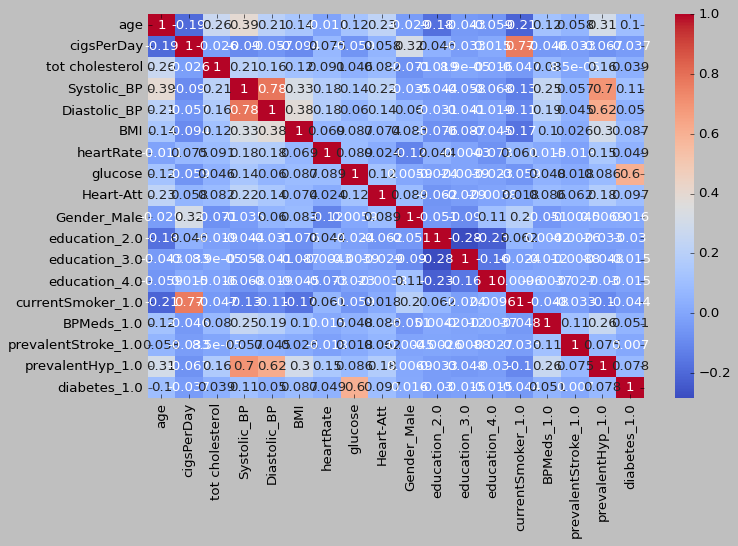

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_knn.corr(), annot=True, cmap='coolwarm')

plt.show()

In [ ]:
df_knn.corr()    ## corelation

,age,cigsPerDay,tot cholesterol,Systolic_BP,Diastolic_BP,BMI,heartRate,glucose,Heart-Att,Gender_Male,education_2.0,education_3.0,education_4.0,currentSmoker_1.0,BPMeds_1.0,prevalentStroke_1.0,prevalentHyp_1.0,diabetes_1.0
age,1.000000,-0.192452,0.263131,0.394027,0.205407,0.136885,-0.011244,0.123114,0.225634,-0.029467,-0.175548,-0.043245,-0.058906,-0.212895,0.121032,0.057689,0.306221,0.101332
cigsPerDay,-0.192452,1.000000,-0.026182,-0.089636,-0.057441,-0.093829,0.075044,-0.059246,0.057631,0.315008,0.045902,-0.033030,0.014725,0.765959,-0.045581,-0.032663,-0.067260,-0.036990
tot cholesterol,0.263131,-0.026182,1.000000,0.208907,0.164445,0.116612,0.090744,0.045817,0.082093,-0.070763,-0.018997,0.000089,-0.016245,-0.047397,0.080072,0.000085,0.164264,0.038851
Systolic_BP,0.394027,-0.089636,0.208907,1.000000,0.784090,0.326624,0.183184,0.138934,0.216332,-0.034588,-0.044397,-0.058156,-0.068200,-0.130706,0.251469,0.056993,0.696111,0.110959
Diastolic_BP,0.205407,-0.057441,0.164445,0.784090,1.000000,0.377691,0.181067,0.060317,0.144931,0.060085,-0.030939,-0.041463,-0.019475,-0.108348,0.192265,0.045157,0.615280,0.049689
BMI,0.136885,-0.093829,0.116612,0.326624,0.377691,1.000000,0.068552,0.086927,0.074126,0.082920,-0.076383,-0.087139,-0.044981,-0.166102,0.100313,0.025933,0.301390,0.086724
heartRate,-0.011244,0.075044,0.090744,0.183184,0.181067,0.068552,1.000000,0.089319,0.023967,-0.116390,0.044438,-0.004337,-0.073171,0.061305,0.015274,-0.017671,0.147397,0.049198
glucose,0.123114,-0.059246,0.045817,0.138934,0.060317,0.086927,0.089319,1.000000,0.120778,0.005879,-0.023502,-0.003855,-0.023371,-0.058974,0.048417,0.017753,0.085537,0.602000
Heart-Att,0.225634,0.057631,0.082093,0.216332,0.144931,0.074126,0.023967,0.120778,1.000000,0.088789,-0.062176,-0.029405,-0.003846,0.018334,0.086448,0.061823,0.176290,0.097344
Gender_Male,-0.029467,0.315008,-0.070763,-0.034588,0.060085,0.082920,-0.116390,0.005879,0.088789,1.000000,-0.051007,-0.090474,0.110791,0.196498,-0.051385,-0.004478,0.006936,0.015850


In [ ]:
df_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4240 non-null   object 
 1   age              4238 non-null   float64
 2   education        4240 non-null   float64
 3   currentSmoker    4240 non-null   float64
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4240 non-null   float64
 6   prevalentStroke  4240 non-null   float64
 7   prevalentHyp     4240 non-null   float64
 8   diabetes         4240 non-null   float64
 9   tot cholesterol  4180 non-null   float64
 10  Systolic_BP      4236 non-null   float64
 11  Diastolic_BP     4235 non-null   float64
 12  BMI              4216 non-null   float64
 13  heartRate        4236 non-null   float64
 14  glucose          3849 non-null   float64
 15  Heart-Att        4240 non-null   int64  
dtypes: float64(14), int64(1), object(1)
memory usage: 530.1+ KB


In [ ]:
## Univariate and Bivariate Analysis

df_mean['Gender'].replace(to_replace = ['Male','Female'],value=[1,0],inplace=True)

In [ ]:
df_median['Gender'].replace(to_replace = ['Male','Female'],value=[1,0],inplace=True)

In [ ]:
## Mean Dataset

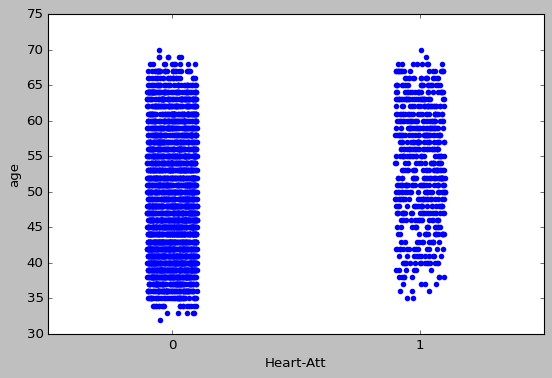

In [ ]:
plt.figure(figsize=(8,5))
sns.stripplot(x=df_mean["Heart-Att"], y=df['age'], jitter=True) # Pass x and y as keyword arguments
plt.show()

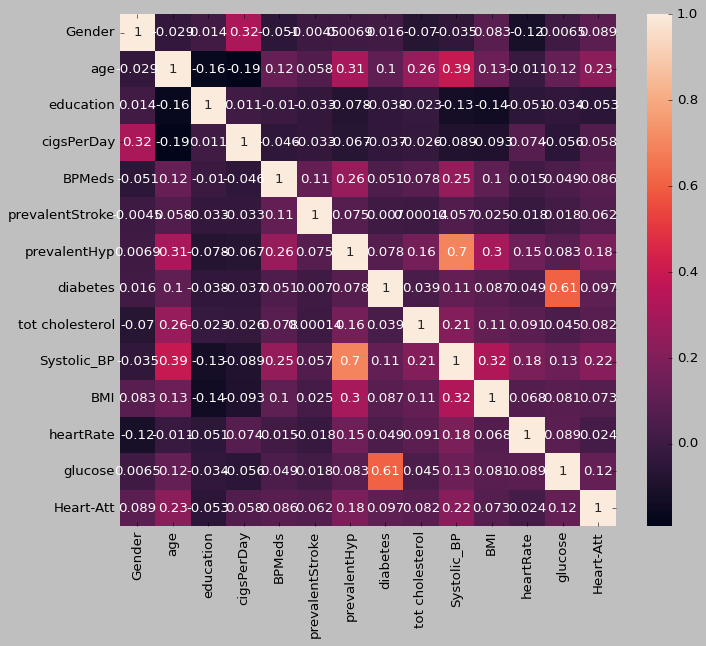

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df_mean.corr(),annot=True)       ## correlation plot
plt.show()

In [ ]:
df_mean.drop(['currentSmoker','Diastolic_BP'],axis=1,inplace=True)

In [ ]:
df_mean

,Gender,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic_BP,BMI,heartRate,glucose,Heart-Att
0,1,39.0,4.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,26.97,80.0,77.0,0
1,0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,28.73,95.0,76.0,0
2,1,48.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,25.34,75.0,70.0,0
3,0,61.0,3.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,28.58,65.0,103.0,1
4,0,46.0,3.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48.0,2.0,20.0,0.0,0.0,0.0,0.0,248.0,131.0,22.00,84.0,86.0,0
4236,0,44.0,1.0,15.0,0.0,0.0,0.0,0.0,210.0,126.5,19.16,86.0,NaN,0
4237,0,52.0,2.0,0.0,0.0,0.0,0.0,0.0,269.0,133.5,21.47,80.0,107.0,0
4238,1,40.0,3.0,0.0,0.0,0.0,1.0,0.0,185.0,141.0,25.60,67.0,72.0,0


In [ ]:
## Outlier Treatment

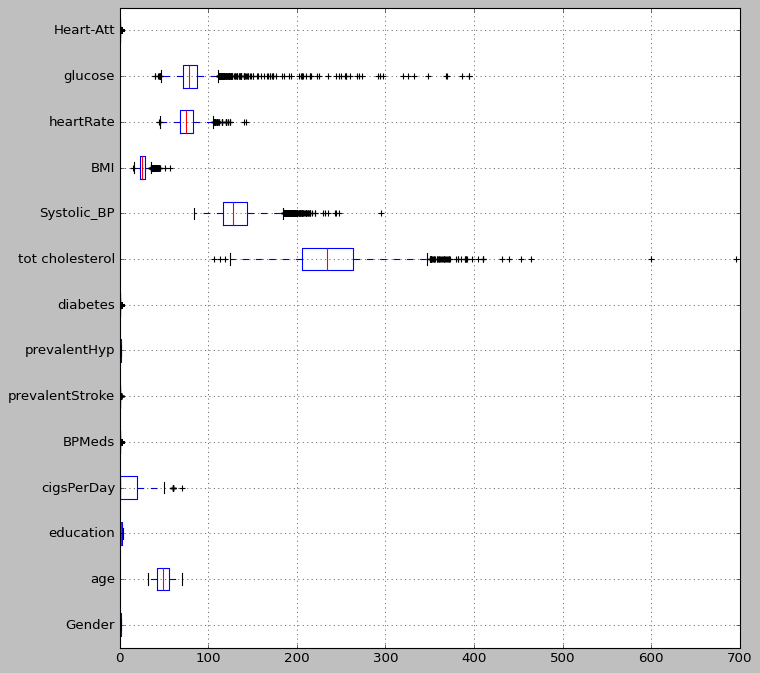

In [ ]:
plt.figure(figsize=(10,10))
df_mean.boxplot(vert=False)
plt.show()

In [ ]:
df_mean_o = df_mean.copy()

In [ ]:
def remove_outlier(col):
  sorted(col)
  Q1,Q3 = np.quantile([25,75])
  IQR = Q3-Q1
  lower_range = Q1 - (1.5*IQR)
  upper_range = Q3 + (1.5*IQR)
  return lower_range,upper_range

In [ ]:
def remove_outlier(col):
  sorted(col)
  Q1,Q3 = np.quantile(col, [0.25,0.75]) # Pass col as the first argument and quantile values in a list
  IQR = Q3-Q1
  lower_range = Q1 - (1.5*IQR)
  upper_range = Q3 + (1.5*IQR)
  return lower_range,upper_range

In [ ]:
## Scaling

In [ ]:
df_mean_o = df_mean_o.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)) if x.dtype in [np.int64, np.float64] else x)

In [ ]:
df_mean_o

,Gender,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic_BP,BMI,heartRate,glucose,Heart-Att
0,1.0,0.184211,1.000000,0.000000,0.0,0.0,0.0,0.0,0.149406,0.106383,0.277024,0.363636,0.104520,0.0
1,0.0,0.368421,0.333333,0.000000,0.0,0.0,0.0,0.0,0.242784,0.177305,0.319680,0.515152,0.101695,0.0
2,1.0,0.421053,0.000000,0.285714,0.0,0.0,0.0,0.0,0.234295,0.208038,0.237518,0.313131,0.084746,0.0
3,0.0,0.763158,0.666667,0.428571,0.0,0.0,1.0,0.0,0.200340,0.314421,0.316045,0.212121,0.177966,1.0
4,0.0,0.368421,0.666667,0.328571,0.0,0.0,0.0,0.0,0.302207,0.219858,0.183228,0.414141,0.127119,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0.0,0.421053,0.333333,0.285714,0.0,0.0,0.0,0.0,0.239389,0.224586,0.156568,0.404040,0.129944,0.0
4236,0.0,0.315789,0.000000,0.214286,0.0,0.0,0.0,0.0,0.174873,0.203310,0.087736,0.424242,NaN,0.0
4237,0.0,0.526316,0.333333,0.000000,0.0,0.0,0.0,0.0,0.275042,0.236407,0.143723,0.363636,0.189266,0.0
4238,1.0,0.210526,0.666667,0.000000,0.0,0.0,1.0,0.0,0.132428,0.271868,0.243820,0.232323,0.090395,0.0


In [ ]:
Avinash Adsare cuc8yohfuftigi